<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/signal_processing_HPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

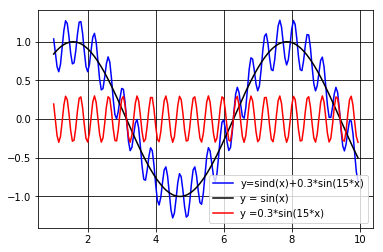

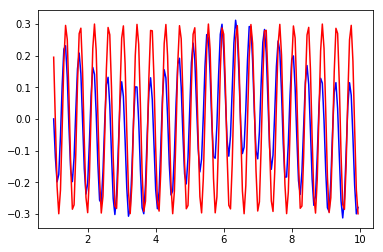

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def highpassFilter(x,dt,timeConstant):
    
    alpha =  timeConstant / (timeConstant + dt);
    
    y=np.zeros(len(x))
    y[0] = 0;
    n=len(x);

    for i in range(1,n):
        y[i] = alpha * y[i-1] + alpha * (x[i] - x[i-1])
    
    return y


x = np.arange(1,10,0.05)
y = np.sin(x)
x2 = np.arange(1,10,0.05)
y2 = 0.3*np.sin(15*x2)
y_tot = y+y2

y_noise=np.zeros(181)
for count in range(0,len(x)):
  y_noise[count] = y_tot[count] + 0.3*(np.random.rand()-0.5)

plt.figure(1)
plt.plot(x,y_tot,'b')
plt.plot(x,y,'k')
plt.plot(x,y2,'r')
plt.legend(['y=sind(x)+0.3*sin(15*x)','y = sin(x)','y =0.3*sin(15*x)'])
plt.grid(color='k')

y_HPF = highpassFilter(y_tot*1,1,2)
plt.figure(2)
plt.plot(x,y_HPF,'b')
plt.plot(x,y2,'r')